<div style="border:solid green 3px; padding: 20px">
<b>🥇 Ростислав, спасибо за доработки, проект принят, молодец!</b>
    
Ты провел отличную работу над ошибками! Уверен, ты обязательно достигнешь своей цели! Успехов в дальнейшем обучении! 🙂
    

Ростислав, привет! Меня зовут Ефимов Денис и сегодня я буду делать ревью твоего проекта!\
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> Некритичное замечание; если таких замечаний меньше трех — проект может быть принят без их отработки.</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Hello World! ✔
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Общее впечатление:</b> 
    
- Ты проделал огромную работу:)
- У меня есть несколько замечаний, исправив которые ты сделаешь проект еще лучше.
- Пробегись по моим комментариям, исправь недочёты и всё будет отлично :)
    
</div>



# Сборный проект №1

### Цель исследования:
1. Исследовать данные об успешности игр из доступных источников
2. Выявить закономерности успешности
3. Спрогнозировать дальнейшую деятельность компании на основе выявленных заканомерностей

Данные доступны по этому пути: /datasets/games.csv. Далее будет произведена оценка данных на количество ошибок в датасете, так как данная информация не дана. Затем на этапе предобработки данных будут удалены все дефекты, которые можно будет устранить, для того, чтобы ошибки не искажали конечные результаты исследования. После этого можно будет приступать к исследовательскому анализу данных, составлению портретов и проверке гипотез.

#### Следовательно, будут выделены такие этапы, как:
- Обзор данных;
- Предобработка данных;
- Категоризация данных по требуемым периодам;
- Выделение потенциально прибыльных платформ;
- Поиск закономерностей;
- Составление портрета пользователя по регионам;
- Проверка гипотез;
- Написание общего вывода по всему исследованию

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Молодец, что написал введение! Но название проекту лучше давать более говорящее  </div>

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Отсюда сразу видны следующие проблемы:
- Неккоректное название столбцов
- Значительное количество пропусков в 3 столбцах: Critic_Score, User_Score, Rating
- Неверные типы данных в столбцах: Year_of_Release, Critic_Score, User_Score

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Отлично, с данными познакомились!  </div>

### Обработка данных

#### Замена названий столбцов

In [5]:
new_columns = []
for column in data.columns:
    new_columns.append(column.lower())
data.columns = new_columns

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

Также названия столбцов можно привести в нижнему регистру, если к `df.columns` применить метод `str.lower`</div>

```python

                                    df.columns = df.columns.str.lower()
    
```

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Спасибо)
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Пожалуйста)  </div>

#### Преобразование типов данных и обработка пропусков

In [6]:
sorted(data['year_of_release'].unique())

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan]

Проверили, что пропущенные значения в стобце не являются пропущенным годом и так как этих значений не так много, то можем просто удалить

In [7]:
data.dropna(subset=['year_of_release'], inplace=True)

In [8]:
data['year_of_release'] = data['year_of_release'].astype(int)

Проверим, из каких значений состоят дефектные столбцы:

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Странное значение tbd. Английская аббревиатура TBD — сокращение от To Be Determined. То есть значение пока не определено.

In [10]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.2       2
1         2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Неопределенных значений большое количество, скорее всего на месте пропусков тоже значения tbd. Возможно, это связано с небольшим количеством игроков, поставивших оценку. И следовательно не набралось достаточной выборки для окончательной средней оценки игры. Значения tbd преобразуем в Nan.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Тут стоит пояснить читателю, что же мы все-таки делаем со значениями 'tbd'?</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Сделано
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [11]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [12]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Здесь все значения целочисленные, поэтому изменим тип на int, когда решим что делать с пропусками

In [13]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинги означают:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

In [14]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

В последних 4 категориях очень мало данных, поэтому можем их просто удалить

In [15]:
data = data.query('rating != "EC" and rating != "K-A" and rating != "RP" and rating != "AO"')

In [16]:
data[data['rating'].isna()]['platform'].value_counts()

PS      986
DS      866
PS2     671
PSP     657
PS3     371
N64     316
Wii     309
GBA     297
3DS     289
PSV     279
SNES    239
X360    202
PC      200
SAT     173
PS4     137
2600    116
NES      98
GB       97
XB       89
GC       85
XOne     61
WiiU     42
DC       38
GEN      29
NG       12
WS        6
SCD       6
3DO       3
TG16      2
GG        1
PCFX      1
Name: platform, dtype: int64

Пропуски в колонке в рейтинге скорее всего связано с тем, что позициям еще не успели присвоить возрастное ограничение, следовательно присвоим рейтинг RP

In [17]:
data['rating'].fillna('RP', inplace=True)

In [18]:
data['user_score'].isna().sum()

8976

In [19]:
data['critic_score'].isna().sum()

8453

In [20]:
data[data['user_score'].isna()]['critic_score'].isna().sum()

7887

Большинство пропусков в обоих колонках совпадают, следовательно причина их возникновения в данных может быть одна

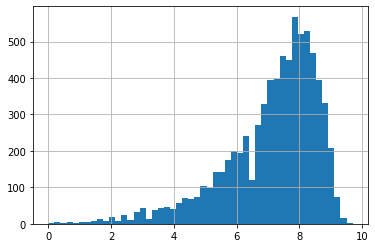

In [21]:
data['user_score'].hist(bins=50);

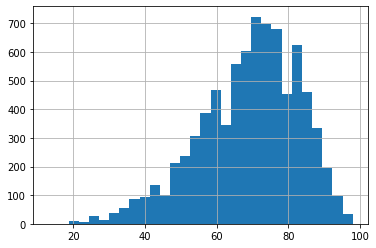

In [22]:
data['critic_score'].hist(bins=30);

Прослеживается нормальное распределение со скошенностью вправо в обоих колонках. Если мы присвоим пропускам медианное значение, то картина распределения сильно исказится, так как пропущенных данных половина от всех.

In [23]:
data.query('~critic_score.isna()')['critic_score'] = data.query('~critic_score.isna()')['critic_score'].astype(int)

/tmp/ipykernel_300/2809597509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.query('~critic_score.isna()')['critic_score'] = data.query('~critic_score.isna()')['critic_score'].astype(int)


В принципе можем не переводить тип данных в int, так как это не помешает в дальнейшем анализе, но а есть какая то функция или метод для более простого перевода в int?


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

Чтобы привести к целочисленному типу данных столбец с пропусками, можно использовать тип `Int64` (с заглавной буквы)</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Спасибо)
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b>👍  </div>

In [24]:
data.duplicated().sum()

0

#### Расчет суммарных продаж

In [25]:
data['all_sales'] = data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales']

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 
    
Еще тут можно использовать метод `DataFrame.sum` с аргументом `axis=1`</div>

```python

        df['total_sum'] = df[['value_1', 'value_2', 'value_3', 'value_4']].sum(axis=1)
    
```

#### Вывод по обработке данных

Были устранены ошибки в данных, такие как:
- Регистр в названии колонок;
- Типы данных;
- Пропуски в данных.

Также в колонках с оценками было принято решение не заполнять пропуски медианными значениями, так как они могут сильно повлиять на картину распределения.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Пропуски и типы данных обработаны, дополнительный столбец рассчитан и добавлен, можно приступать к исследованию! </div>

### Исследовательский анализ данных

#### Определение актуального периода продаж

In [26]:
len(data['year_of_release'].unique())

37

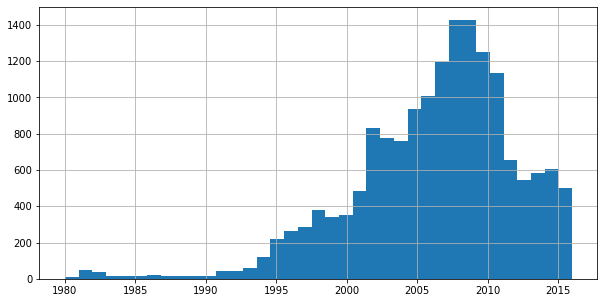

In [27]:
data['year_of_release'].hist(bins=37, figsize=(10,5));


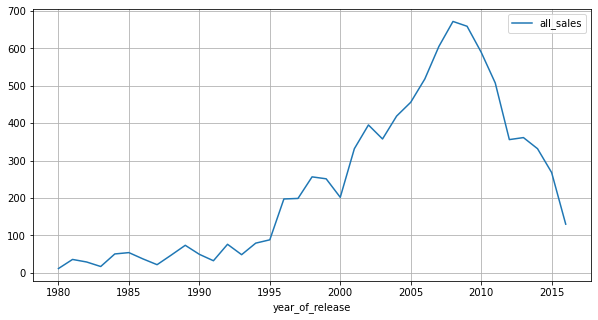

In [28]:
(
    data
    .pivot_table(index='year_of_release',values='all_sales', aggfunc='sum')
    .plot(grid=True, figsize=(10,5))
);

Видно, что количество выпущенных игр и продажи росли из года в год до 2008 года, после этого заметен характерный спад. Скорее всего, это связано с переходом продаж игр с дисковых носителей на цифровую дистрибуцию, тем самым, как следствие, рост пиратства.

In [29]:
(
    data
    .pivot_table(index=['platform','year_of_release'], 
                 values='all_sales', 
                 aggfunc='sum'
                )
    .head()
)

all_sales
platform year_of_release           
2600     1980                 11.38
         1981                 35.68
         1982                 28.88
         1983                  5.84
         1984                  0.27

In [30]:
top10_sales_platform = (data
                       .pivot_table(index='platform',
                                    values='all_sales', 
                                    aggfunc='sum'
                                   )['all_sales']
                       .sort_values(ascending=False)
                       .index[:10]
                      )
top10_sales_platform

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Все библиотеки лучше импортировать в самом начале проекта, в отдельной ячейке. Если в процессе работы появилась необходимость добавить библиотеку, то ее можно дописать в эту ячейку и исполнить.</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Принял
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

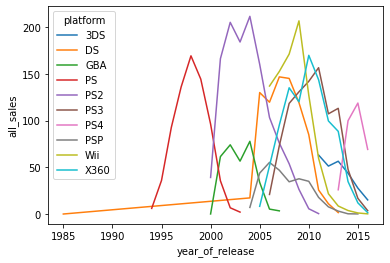

In [31]:
top = (
    data
    .pivot_table(index=['platform', 'year_of_release'],
                 values='all_sales', 
                 aggfunc='sum'
                )
    .query('platform in @top10_sales_platform')
)
top.reset_index(inplace=True)
sb.lineplot(data=top, x='year_of_release', y='all_sales', hue='platform');# не смог построить график, используя метод plot, поэтому использую seaborn

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>
    
 - Кстати, в будущем тебе нужно будет подписывать каждый график и оси на нем для удобства восприятия. Есть [хорошая статья](https://devpractice.ru/matplotlib-lesson-3-3-text-elements/), которая подскажет как это правильно сделать)

 - Не заметил ли ты на графике некоторую странность (возможно ошибку)?</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Спасибо за статью.
Ошибку теперь заметил, исправил
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

Видим на графике, что у всех платформ характерный срок популярности варьируется от 5 до 10 лет. Поэтому в прогнозировании примем за актуальный период 7 лет (среднее), то есть период с 2010 по 2016 года.

In [32]:
data = data.query('~(year_of_release == 1985 and platform == "DS")')

#### Оценка наиболее прибыльных платформ за актуальный период

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Актуальный период выбрал немного больше чем нужно. В этот срез могут попасть уже неактуальные платформы.    

Учитывая высокую динамичность рынка, мы можем сделать вывод, что для дальнейшего анализа нам потребуются данные по платформам, возникшим не ранее 3 лет назад по отношению к 2017 году, на который нам нужно сделать прогноз и запланировать рекламные кампании. Так мы сможем выделить успешные платформы, которые на 2017 год будут находиться в периоде финального роста или выйдут на плато. </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Понял, исправил
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [33]:
data_actual = data.query('year_of_release > 2013')

In [34]:
top10_sales_platform_actual = (data_actual
                       .pivot_table(index='platform',
                                    values='all_sales', 
                                    aggfunc='sum'
                                   )['all_sales']
                       .sort_values(ascending=False)
                       .index[:10]
                      )
top10_sales_platform_actual

Index(['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP'], dtype='object', name='platform')

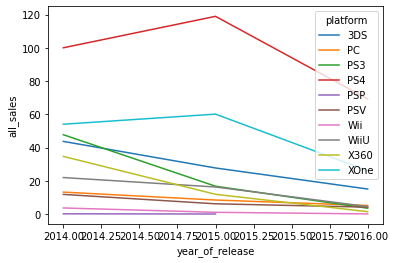

In [35]:
top_actual = (
    data_actual
    .pivot_table(index=['platform', 'year_of_release'],
                 values='all_sales', 
                 aggfunc='sum'
                )
    .query('platform in @top10_sales_platform_actual')
)
top_actual.reset_index(inplace=True)
sb.lineplot(data=top_actual, x='year_of_release', y='all_sales', hue='platform');

По сравнению с 2015 годом, все платформы падают по продажам. Причина этого может быть связяна с тем, что не все данные еще доступны по 2016 году. Тем не менее самыми популярными платформами в 2016 году являются PS4, XOne, 3DS.
Рост показывают такие платформы как PS4 и XOne, а остальные платформы постепенный спад или стагнацию.


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Потенциально прибыльные платформы ты выделил верно! </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

- Библиотеку достаточно импортировать один раз и делать это стоит в отдельной ячейке в самом начале, о чем я уже писал выше.

- Каждый раз фильтровать данные по году не очень удобно, это усложняет код и повышает вероятность совершения ошибки. Актуальный период лучше выделить в отдельный датафрейм и работать с ним.</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Понял, исправил
</div>

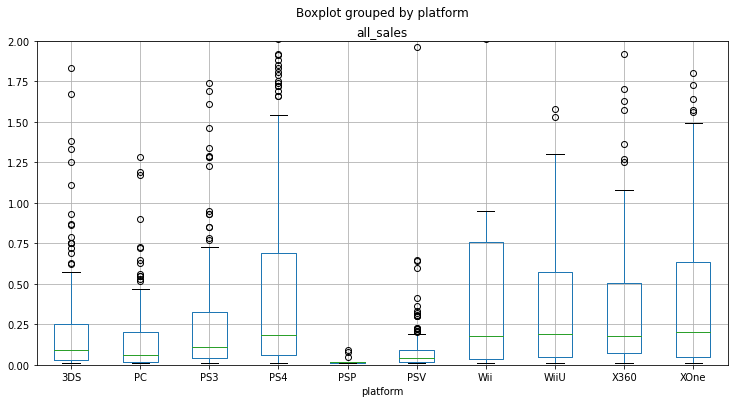

In [36]:
import matplotlib.pyplot as plt
(
    data_actual
    .query('platform in @top10_sales_platform_actual')
    .boxplot(column='all_sales', 
             by='platform', 
             figsize=(12,6)
            )
)
plt.ylim(0, 2)
plt.show()

Медианное значение выше у таких платформ, как Wii, WiiU, XOne, PS4 и X360, следовательно можно считать данные платформы наиболее успешными за последние 3 года. Но учитывая рост продаж таких платформ, как XOne и PS4, то можно ожидать, что по показателям они будут выше

#### Исследование влияния отзывов пользователей и критиков на продажи трех популярных платформ 

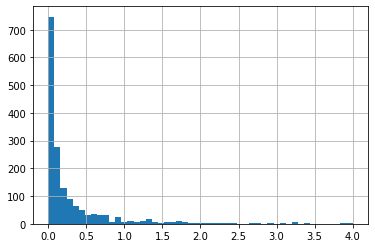

In [37]:
data_actual['all_sales'].hist(bins=50,range=(0,4));

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
 - Анализировать зависимость продаж от оценок необходимо также по актуальному периоду.
 - А для чего мы ограничиваем продажи? Это может исказить результаты.
</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Понял, исправил
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [38]:
(
    data_actual
    .query('platform=="PS4"')
    [['all_sales','critic_score','user_score']]
    .corr()
)

,all_sales,critic_score,user_score
all_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


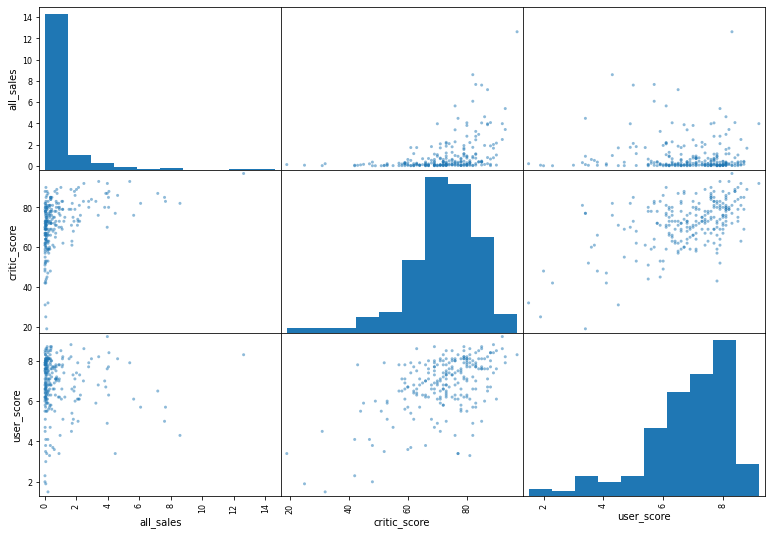

In [39]:
pd.plotting.scatter_matrix(data_actual
                           .query('platform=="PS4"')
                           [['all_sales','critic_score','user_score']], 
                           figsize=(13,9)
                          );

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Тут нагляднее будет построить отдельные распределения для оценок пользователей и критиков</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

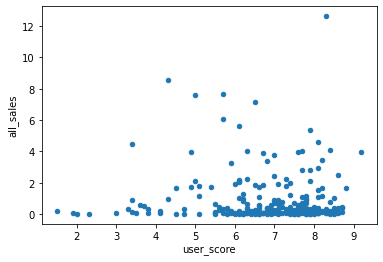

In [40]:
data_actual.query('platform=="PS4"').plot(x='user_score' , y='all_sales', kind='scatter');

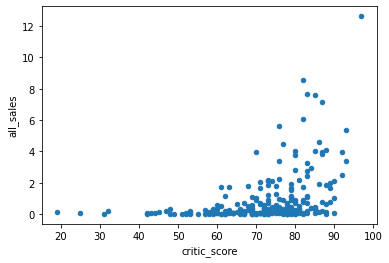

In [41]:
data_actual.query('platform=="PS4"').plot(x='critic_score' , y='all_sales', kind='scatter');

In [42]:
(
    data_actual
    .query('platform=="PS3"')
    [['all_sales','critic_score','user_score']]
    .corr()
)

,all_sales,critic_score,user_score
all_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


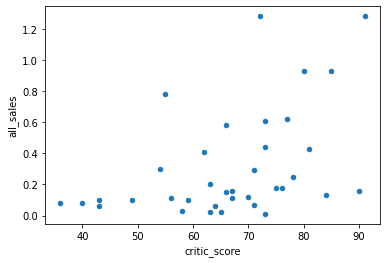

In [43]:
data_actual.query('platform=="PS3"').plot(x='critic_score' , y='all_sales', kind='scatter');

In [44]:
(
    data_actual
    .query('platform=="XOne"')
    [['all_sales','critic_score','user_score']]
    .corr()
)

,all_sales,critic_score,user_score
all_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


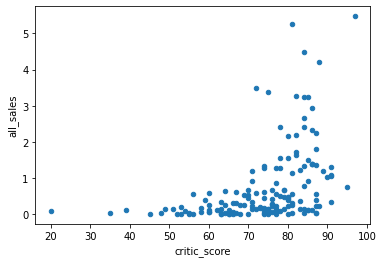

In [45]:
data_actual.query('platform=="XOne"').plot(x='critic_score' , y='all_sales', kind='scatter');

In [46]:
(
    data_actual
    .query('platform=="3DS"')
    [['all_sales','critic_score','user_score']]
    .corr()
)

,all_sales,critic_score,user_score
all_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b>

Заметил ли ты, что код для построения распределений и расчета коэффициентов корреляций повторяется? Его лучше обернуть в функцию.</div>

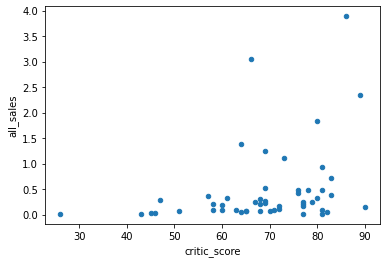

In [47]:
data_actual.query('platform=="3DS"').plot(x='critic_score' , y='all_sales', kind='scatter');

Просмотрели зависимость количества продаж игр на платформе PS4 от оценок за актуальный период и выяснили, что прослеживается невысокие значения корреляции зависимости продаж от оценок критиков. Также измеряя зависимости на других платформах (XOne, PS3, 3DS) выявили невысокие значения корреляции.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

А невысокие значения корреляции есть? Или совсем нет никакой зависимости?</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Есть, описал выше
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

#### Оценка наиболее прибыльных жанров за актуальный период

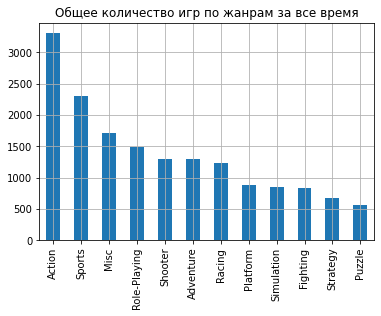

In [48]:
data['genre'].value_counts().plot(kind='bar', title='Общее количество игр по жанрам за все время', grid=True);

Распределение по жанрам за все время

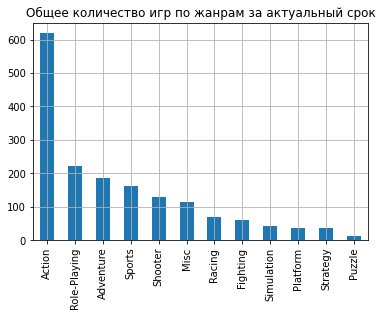

In [49]:
(
    data_actual
    ['genre']
    .value_counts()
    .plot(kind='bar', title='Общее количество игр по жанрам за актуальный срок', grid=True)
);

Распределение по жанрам за актуальный срок. Видно существенное преимущество в количестве игр жанра Action относительно других жанров.

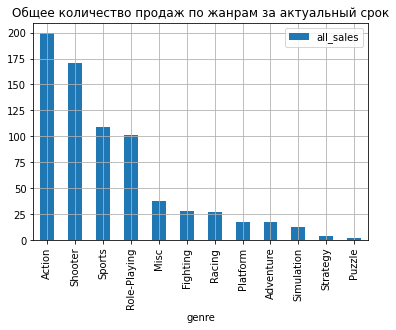

In [50]:
(
    data_actual
    .pivot_table(index='genre', 
                 values='all_sales', 
                 aggfunc='sum'
                )
    .sort_values('all_sales', ascending=False)
    .plot(kind='bar', title='Общее количество продаж по жанрам за актуальный срок', grid=True)
);

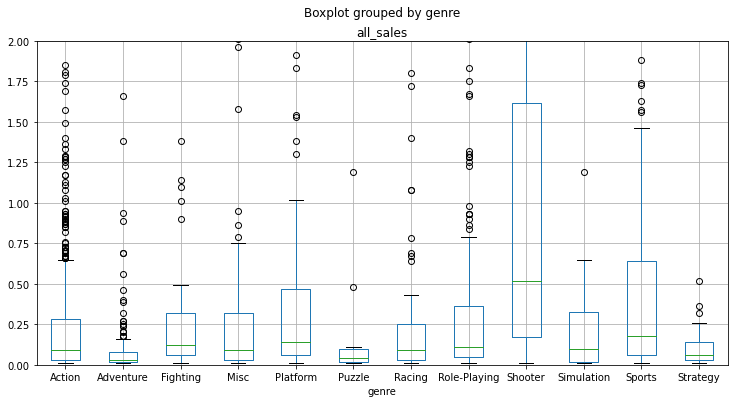

In [51]:
(
    data_actual
    .boxplot(column='all_sales', 
             by='genre', 
             figsize=(12,6)
            )
)
plt.ylim(0, 2)
plt.show()

Среднее значение количества продаж по жанрам самое высокое у жанра Shooter, не смотря на общее количество продаж за все время.
То есть, в среднем любая взятая игра из жанра Shooter будет больше продаваться, чем любая взятая игра из Action. Самые низкие показатели продаж среди жанров, как по общему количеству, так и по среднему - это Adventure, Puzzle, Strategy.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 
    
Молодец, что рассматривал именно медианные продажи (именно они указаны зеленой горизонтальной чертой в боксплотах, это не средние значения), это наиболее объективный показатель прибыльности, так как они не подвержены влиянию выбросов (которых в игровой индустрии достаточно много за счет продаж хитовых и популярных игр). 
</div>

#### Вывод

Из всего датафрейма был выбран актуальный период в 3 года, так как нам требовалось произвести анализ игровой индустрии для предсказания поведения индустрии в дальнейшем. Предыдущие года не акутальны, так как средняя продолжительность популярности различных платформ варьируется от 5 до 10 лет. Следовательно, чтобы отследить перспективные платформы, нужно брать половину срока, то есть когда они растут, либо выходят на плато.

Также при исследовании было выявлено, что рост продаж наблюдаются у таких платформ как PS4 и XOne, у остальных либо падение, либо стагнация.

При анализе влияния отзывов пользователей и критиков на продажи были выявлены невысокие значения корреляций продаж от оценок критиков.

Оценивая наиболее прибыльные жанры, было выявлено, что в среднем  любая взятая игра из жанра Shooter будет больше продаваться, чем любая взятая игра из любого жанра. По общему количеству продаж лидирует жанр Action. Самые низкие показатели продаж среди жанров, как по общему количеству, так и по среднему - это Adventure, Puzzle, Strategy.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Здорово, что написал промежуточный вывод! </div>

### Составление портрета пользователя

#### Анализ популярности платформ по регионам

In [52]:
def top5par_reg(par, reg_sales):
    result = (
    data_actual
    .pivot_table(index=par,
                 values=reg_sales,
                 aggfunc='sum'
                )
    .sort_values(reg_sales, ascending=False)
    .index[:5]
    )
    return list(result)

In [53]:
print('Топ 5 платформ в Северной Америке за актуальный период:', top5par_reg('platform' ,'na_sales'))
print('Топ 5 платформ в Европе за актуальный период:', top5par_reg('platform' ,'eu_sales'))
print('Топ 5 платформ в Японии за актуальный период:', top5par_reg('platform' ,'jp_sales'))

Топ 5 платформ в Северной Америке за актуальный период: ['PS4', 'XOne', 'X360', '3DS', 'PS3']
Топ 5 платформ в Европе за актуальный период: ['PS4', 'XOne', 'PS3', 'PC', '3DS']
Топ 5 платформ в Японии за актуальный период: ['3DS', 'PS4', 'PSV', 'PS3', 'WiiU']


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Круто ,что пишешь функции! </div>

In [54]:
def plot_pie(par,reg):
    data_plot = data_actual.pivot_table(index=par, values=reg, aggfunc='sum')
    data_plot1 = data_plot[reg].sort_values(ascending=False)[:5]
    data_plot['new'] = data_plot.index.where(data_plot.index.isin(data_plot1.index), 'other')
    return data_plot.pivot_table(index='new', values=reg, aggfunc='sum')

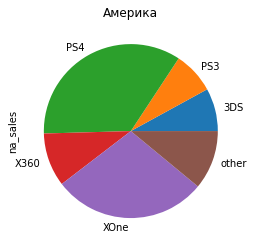

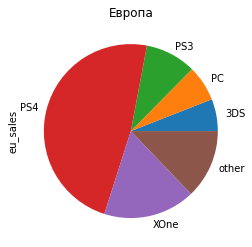

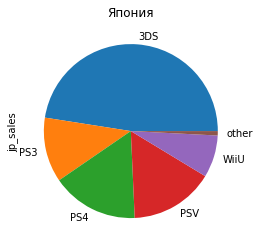

In [55]:
plot_pie('platform','na_sales').plot(kind='pie',subplots=True, legend=False, title=['Америка'])
plot_pie('platform','eu_sales').plot(kind='pie',subplots=True, legend=False, title=['Европа'])
plot_pie('platform','jp_sales').plot(kind='pie',subplots=True, legend=False, title=['Япония']);

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Нужно стараться, чтобы цвета на диаграмме не повторялись, это может ввести в заблуждение.

Для подбора цветов я использую [этот отличный сайт](https://colorhunt.co/palettes/pastel)



На диаграмме лучше оставить именно интересующие нас топ-5 платформ, а остальные объединить в отдельную категорию</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Выделил отдельную категорию функцией
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

Видно, что по популярности платформ Европа и Америка почти не отличаются, но Япония имеет очень сильные различия, по сравнению с другими регионами. Платформа PS3 одинаково популярна в этих трех регионах, но по остальным доли рынка различаются.

#### Анализ популярности жанров по регионам

In [56]:
print('Топ 5 жанров в Северной Америке за актуальный период:', top5par_reg('genre', 'na_sales'))
print('Топ 5 жанров в Европе за актуальный период:', top5par_reg('genre', 'eu_sales'))
print('Топ 5 жанров в Японии за актуальный период:', top5par_reg('genre', 'jp_sales'))

Топ 5 жанров в Северной Америке за актуальный период: ['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc']
Топ 5 жанров в Европе за актуальный период: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
Топ 5 жанров в Японии за актуальный период: ['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter']


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Заметил ли ты, что эта функция аналогична функции выше? Она различаются лишь одним параметром, который можно вынести в аргументы функции. Тогда эту функцию можно будет использовать и для рейтингов.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

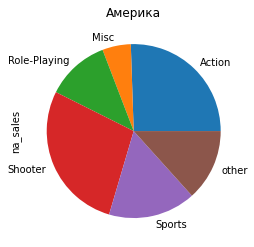

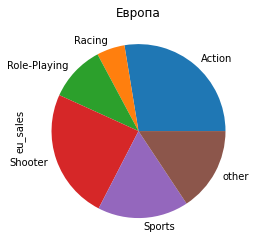

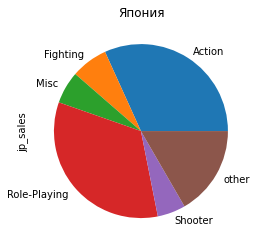

In [57]:
plot_pie('genre','na_sales').plot(kind='pie',subplots=True, legend=False, title=['Америка'])
plot_pie('genre','eu_sales').plot(kind='pie',subplots=True, legend=False, title=['Европа'])
plot_pie('genre','jp_sales').plot(kind='pie',subplots=True, legend=False, title=['Япония']);

Та же самая картина и по жанрам: портреты европейского пользователя и американского очень схожи. Японский пользователь наравне с остальными интересуется жанром Action, но по остальным жанрам имеет существенные различия. К примеру жанр Role-Playing занимает существенную долю на рынке по сравнению с другими.

#### Анализ влияния рейтинга ESRB на продажи по регионам

In [58]:
(
    data_actual
    .pivot_table(index='rating',
                 values=['eu_sales', 'na_sales', 'jp_sales'],
                 aggfunc='sum'
                )
)

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
RP,58.95,56.90,64.72
T,34.07,14.78,38.95


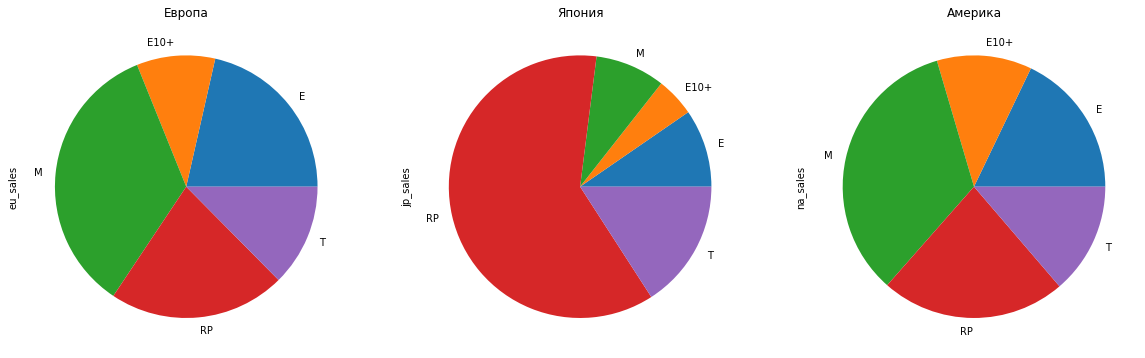

In [59]:
(
    data_actual
    .pivot_table(index='rating',
                 values=['na_sales', 'eu_sales', 'jp_sales'],
                 aggfunc='sum',
                )
    .plot(kind='pie',subplots=True, legend=False, figsize=(20,10), title=['Европа', 'Япония', 'Америка'])
);

Поведение пользователей в Америке и Европе также схожи и по возрастному рейтингу: самые популярные игры с возрастным рейтингом "для взрослых" и "для всех". В Японии большую долю занимают игры с неопределенным рейтингом (скорее всего это игры для внутреннего рынка). Игры с назначенным рейтингом, которые пользуются популярностью: "для всех" и "для подростков".

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Как ты думаешь, почему в Японии большинство игр не имеют рейтинга ESRB?</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Было написано выше
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Я надеялся на более развернутый ответ) В Японии есть своя рейтинговая система CERO  </div>

#### Вывод

При анализе портетов пользователей из разных регионов были выявлены следующие закономерности:
1. Среднестатистический пользователь Америки почти не отличается от Европейского;
2. Японский игровой рынок сильно отличается по предпочтениям в платформах, жанрах и возрастном рейтинге игр от остального мира
3.  В Японии большую долю занимают игры с неопределенным рейтингом (скорее всего это игры для внутреннего рынка)
4. Плафторма PS3 и жанр Action одинаково популярен во всем мире

### Проверка гипотез

#### Первая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Проверку гипотез нужно проводить также по данным из актуального периода.</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Понял, исправил
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [60]:
scores_xone = data_actual.query('platform == "XOne"')['user_score']
scores_pc = data_actual.query('platform == "PC"')['user_score']

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 
    
Кстати, можно не отфильтровывать пропуски из сравниваемых выборок, а передать в ttest_ind аргумент nan_policy с нужным значением, тогда они будут игнорироваться. Подробнее можно почитать [здесь](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Спасибо)
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Пожалуйста) </div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Перед проверкой нужно обязательно формулировать как нулевую, так и альтернативную гипотезы.</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Понял, исправил
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [61]:
alpha = 0.01
results = st.ttest_ind(scores_xone, scores_pc, equal_var=False, nan_policy='omit')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза прошла бы даже по пороговому значению alpha = 0.05, следовательно, изначальная гипотеза наиболее вероятна

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
После проверки каждой из гипотез нужно формулировать вывод по полученным результатам</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Понял, исправил
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> 
    
Вывод корректнее сформулировать так:

    С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий



P.S. А в гипотезе ниже наоборот)</div>

#### Вторая гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Нулевая гипотеза всегда формулируется исходя из равенства проверяемых метрик (как в первой гипотезе)</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Понял, исправил
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны

In [62]:
scores_action = data.query('genre == "Action"')['user_score']
scores_sports = data.query('genre == "Sports"')['user_score']

alpha = 0.01

results = st.ttest_ind(scores_action, scores_sports, equal_var=False, nan_policy='omit')


print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


0.07607291840585198
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза прошла бы даже по пороговому значению alpha = 0.05, следовательно, изначальная гипотеза наименее вероятна

####  Вывод по гипотезам
Первая гипотеза подтвердилась, а вторая нет. То есть вероятнее всего можно сказать по первой гипотезе, что средние пользовательские рейтинги платформ Xbox One и PC равны и по второй - средние пользовательские рейтинги жанров Action и Sports равны.
Нулевые гипотезы формулировались равенством средних двух генеральных совокупностей, альтернативные НЕравенством. Пороговое значение было задано 0.01, но нулевые гипотезы проходили даже по 0.05
Гипотеза была использована для двух средних независимых генеральных совокупностей, так как данные не зависимы друг от друга. Также был применен параметр для не равных дисперсий, так как размер выборок не равный.

### Общий вывод

#### При изучении общей информации о данных были выявлены и устранены такие проблемы как:
1. Пропуски во многих колонках, причем от некоторых избавились путем удаления строк (небольшой процент), а от некоторых, заполнением логичными данными (в некоторых колонках не избавились от пропусков, так как они занимали существенный процент данных, для того чтобы просто удалить и к тому же нельзя было заполнить пропуски логическими значениями;
2. Аномальные значения тоже были удалены, так как их было малое количество;
3. Подправлены типы данных в зависимости от критериев;
4. Явные дубликаты не были найдены.
5. Был добавлен дополнительный столбец с суммой продаж "all_sales".

#### В исправленном датафрейме были исследованы данные и найдены интересные закономерности, такие как:
- Cредняя продолжительность популярности различных платформ варьируется от 5 до 10 лет;
- Рост продаж наблюдаются у таких платформ как PS4 и XOne, у остальных либо падение, либо стагнация;
- При анализе влияния отзывов пользователей и критиков на продажи  прослеживается невысокие значения корреляции зависимости продаж от оценок критиков;
- В среднем  любая взятая игра из жанра Shooter будет больше продаваться, чем любая взятая игра из любого жанра;
- По общему количеству продаж лидирует жанр Action;
- Среднестатистический пользователь Америки почти не отличается от Европейского;
- Японский игровой рынок сильно отличается по предпочтениям в платформах, жанрах и возрастном рейтинге игр от остального мира;
- В Японии большую долю занимают игры с неопределенным рейтингом (скорее всего это игры для внутреннего рынка);
- Плафторма PS3 и жанр Action одинаково популярен во всем мире;
- Вероятнее всего, что средние пользовательские рейтинги платформ Xbox One и PC равны;
- Вероятнее всего, что средние пользовательские рейтинги жанров Action и Sports равны.

#### Рекомендации отделу маркетинга:
- Сосредоточиться на играх на платформах PS4 и XOne;
- Обращать небольшое внимание на отзывы критиков;
- Жанр Shooter показывает наибольшие медианные продажи;
- Японская игровая индустрия отличается от мировой;
- Наибольшую долю рынка занимает жанр Action;
- Плафторма PS3 и жанр Action одинаково популярен во всем мире;

Топ 5 платформ в Северной Америке за актуальный период: PS4, XOne, X360, 3DS, PS3 \
в Европе: PS4, XOne, PS3, PC, 3DS \
в Японии: 3DS, PS4, PSV, PS3, WiiU 

Топ 5 жанров в Северной Америке за актуальный период: 'Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc'\
в Европе: 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing'\
в Японии: 'Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter'

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Хороший резюмирующий вывод, но еще нужно дать рекомендации отделу маркетинга для проведения рекламной кампании в 2017 году. 


Хочу обратить твое внимание на то, что после исправления замечаний в некоторых пунктах исследования могут измениться результаты, поэтому нужно будет подкорректировать выводы.</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Вроде все исправил
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>